In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-stock-prices-20152020/AAPL.csv


## copy from:
https://www.kaggle.com/suyashlakhani/stock-price-prediction-and-forecasting-lstm

In [3]:
df = pd.read_csv('../input/apple-stock-prices-20152020/AAPL.csv')

In [4]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
df.shape

(1258, 15)

In [6]:
df1 = df.reset_index()['close']

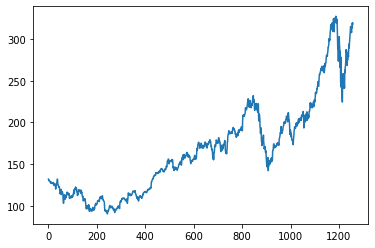

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1 

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [10]:
df1.shape

(1258, 1)

In [11]:
##splitting dataset into train and test split
train_size = int(len(df1)*0.65)
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [13]:
len(train_data),len(test_data)

(817, 441)

In [14]:
#Data Preprocessing
# convert an array of values into a dataset matrix

def create_ds(dataset,time_steps):   #Time Steps is how many previous records considered to predict the current record
    data_x,data_y = [],[]
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps),0]
        data_x.append(a)
        b = dataset[i+time_steps,0]
        data_y.append(b)
    return np.array(data_x),np.array(data_y)
    

In [15]:
time_step = 100
X_train, y_train = create_ds(train_data, time_step)
X_test, ytest = create_ds(test_data, time_step)

In [18]:
X_train.shape

(716, 100)

In [19]:
y_train.shape

(716,)

In [20]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [22]:
y_train

array([0.0873934 , 0.09030651, 0.09891919, 0.09887697, 0.10622309,
       0.1213375 , 0.10529427, 0.10221228, 0.12213966, 0.12745926,
       0.1231107 , 0.1302035 , 0.13607194, 0.13366546, 0.1291058 ,
       0.12969687, 0.12762813, 0.1115849 , 0.10879845, 0.1071519 ,
       0.09288187, 0.10062906, 0.09858144, 0.11378029, 0.12007093,
       0.12226632, 0.11572237, 0.12049312, 0.1169045 , 0.11597568,
       0.11804441, 0.11399139, 0.10951617, 0.10495651, 0.1211264 ,
       0.11795998, 0.11774888, 0.10672971, 0.10905176, 0.09642827,
       0.09347294, 0.08507135, 0.08865997, 0.07869628, 0.06624166,
       0.07173014, 0.07130795, 0.07713417, 0.07468547, 0.06957697,
       0.07768302, 0.07168792, 0.0629908 , 0.06337077, 0.05222494,
       0.04373892, 0.02579583, 0.027949  , 0.03457739, 0.04061471,
       0.02976442, 0.03875707, 0.02866672, 0.02668243, 0.02723128,
       0.02516254, 0.04677869, 0.03841932, 0.04074137, 0.01300346,
       0.01583214, 0.02955332, 0.02571139, 0.01747868, 0.02537

In [21]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
#Model Creation 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
X_train.shape

(716, 100, 1)

In [29]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/100
12/12 [==============================] - 7s 618ms/step - loss: 0.0081 - val_loss: 0.0549
Epoch 2/100
12/12 [==============================] - 7s 607ms/step - loss: 0.0024 - val_loss: 0.0083
Epoch 3/100
12/12 [==============================] - 7s 602ms/step - loss: 9.6955e-04 - val_loss: 0.0039
Epoch 4/100
12/12 [==============================] - 7s 608ms/step - loss: 7.6085e-04 - val_loss: 0.0046
Epoch 5/100
12/12 [==============================] - 7s 597ms/step - loss: 6.7675e-04 - val_loss: 0.0048
Epoch 6/100
12/12 [==============================] - 7s 607ms/step - loss: 6.0888e-04 - val_loss: 0.0039
Epoch 7/100
12/12 [==============================] - 7s 600ms/step - loss: 6.2215e-04 - val_loss: 0.0046
Epoch 8/100
12/12 [==============================] - 7s 606ms/step - loss: 6.1031e-04 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 7s 600ms/step - loss: 5.9760e-04 - val_loss: 0.0051
Epoch 10/100
12/12 [==============================] - 7s 575ms/

In [35]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [36]:
# We have scaled it, so we need to reverse scale it to find the o/p
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
#rmse
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

143.51319338767064

In [38]:
math.sqrt(mean_squared_error(ytest,test_predict))

239.77508442778552

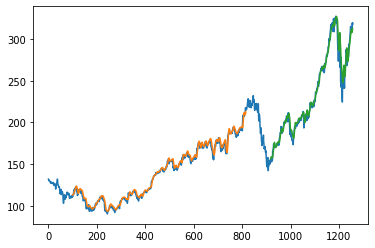

In [39]:
plt.plot(scaler.inverse_transform(df1))
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
plt.plot(trainPredictPlot)
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(testPredictPlot)

In [76]:
#predicting future 30 days
#For predicting next day after last test data, we need to take previous 100 values(timestep)
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [69]:
test_data.shape

(441, 1)

In [77]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [71]:
a = [1,2,3]
a.extend([0])
a

[1, 2, 3, 0]

In [78]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        print('a',temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        print('b1',temp_input)
        temp_input=temp_input[1:]
        print('b2',temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9566271]
101
a [0.8583551465000423, 0.8866418981676942, 0.8743139407244789, 0.8843198513890065, 0.8783669678290975, 0.8986321033521913, 0.925821160179009, 0.9287764924427933, 0.9567677108840666, 0.9386979650426415, 0.933040614709111, 0.9495060373216249, 0.9642404796082076, 0.9551211686228154, 0.9598919192772104, 0.9663514312251966, 0.9624672802499368, 0.9229502659799038, 0.9598497002448705, 0.9879253567508233, 0.985941062230854, 0.9253145317909315, 0.9217259140420504, 0.964747107996285, 0.9757240564046274, 0.9915984125643842, 0.9697289538123788, 0.9761462467280253, 0.9679557544541082, 1.0000000000000002, 0.9901629654648318, 0.9905007177235499, 0.9653803934813816, 0.9848855864223593, 0.9708688676855528, 0.9402600692392133, 0.8774803681499621, 0.8348391454867856, 0.8541332432660644, 0.7733682344000676, 0.7726927298826314, 0.8801401671873683, 0.8400743054969182, 0.8967322468969012, 0.8552731571392387, 0.8388499535590646, 0.7423372456303303, 0.8232711306256861, 0.7814320695769654, 0.666

In [79]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

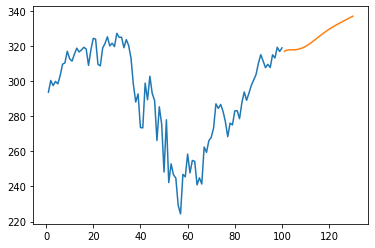

In [80]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

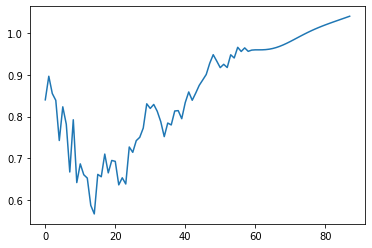

In [81]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [82]:
df3=scaler.inverse_transform(df3).tolist()

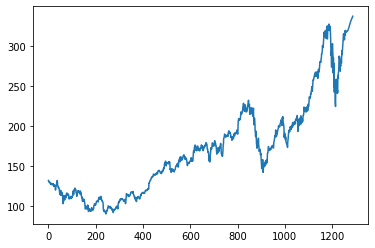

In [83]:
plt.plot(df3)